<a href="https://colab.research.google.com/github/chinmayram/github-example/blob/master/MNIST_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


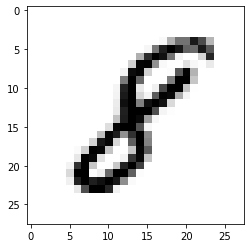

In [3]:
import matplotlib.pyplot as plt
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0964 - acc: 0.9702
Epoch 2/5
60000/60000 [==============================] - 31s 509us/sample - loss: 0.0605 - acc: 0.9809
Epoch 3/5
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0458 - acc: 0.9850
Epoch 4/5
60000/60000 [==============================] - 31s 510us/sample - loss: 0.0364 - acc: 0.9884
Epoch 5/5
60000/60000 [==============================] - 31s 512us/sample - loss: 0.0295 - acc: 0.9901


In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 204us/sample - loss: 0.0581 - acc: 0.9841


[0.05810137231613262, 0.9841]

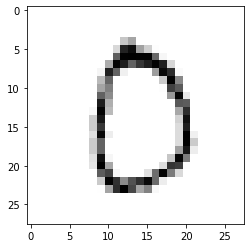

In [12]:
import matplotlib.pyplot as plt
image_index = 567
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

In [13]:
x=x_test[image_index].reshape(1,28,28,1)
pred = model.predict(x)
print(pred.argmax())

0
